### Reinforcement Learning 
#### Upper Confidence Bound Algorithm (UCB)

In [1]:
# ##########################   SCENARIO   ##################################################################
# Since we do not have a real time data feed we are going to read in some simulation data
# In this scenario we are going to pick one of 10 satellites to engage at a given round
# Some of these satellites are capable of detecting ship of interest others are not
# We will know that only once we engage them
# No satellite works all the time
# Our goal is to pick the satellite that has highest probability of working
# We only have past information and up to present to determine which satellite we will pick in the future
# There is no guarantee that the current best pick will provide same results in the future

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the SIMULATED dataset
# This information is not normaly known in advance but only revealed as we make decisions in real time.
dataset = pd.read_csv('Satellite_Optimization.csv')
Rows,Cols = dataset.shape

In [4]:
dataset.head(4)

,SAT 1,SAT 2,SAT 3,SAT 4,SAT 5,SAT 6,SAT 7,SAT 8,SAT 9,SAT 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0


Index(['SAT 1', 'SAT 2', 'SAT 3', 'SAT 4', 'SAT 5', 'SAT 6', 'SAT 7', 'SAT 8',
       'SAT 9', 'SAT 10'],
      dtype='object')


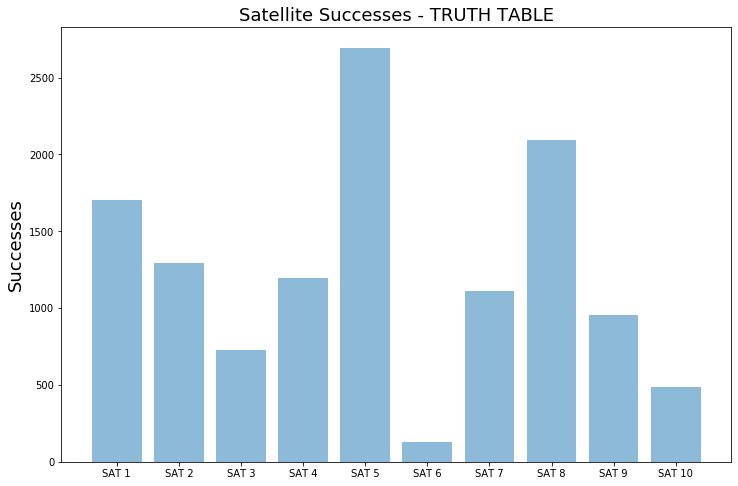

In [6]:
# Truth Values
DVSum = dataset.sum(axis=0)
objects = DVSum.index
print(objects)
y_pos = np.arange(len(objects))
plt.bar(y_pos, DVSum, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Successes', fontsize=18)
plt.title('Satellite Successes - TRUTH TABLE', fontsize=18)
# Control Size
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()
# SAT 1 to 10

#### Random Selection

In [7]:
# Randomly Select Satellites
import random
N = Rows
d = Cols
Sat_selected = []
total_reward = 0
for n in range(0, N):
    Sat = random.randrange(d) # Generate one random number in range
    Sat_selected.append(Sat)
    reward = dataset.values[n, Sat]
    total_reward = total_reward + reward

In [8]:
total_reward # How many 1's did we pull from the dataset by random guess

1241

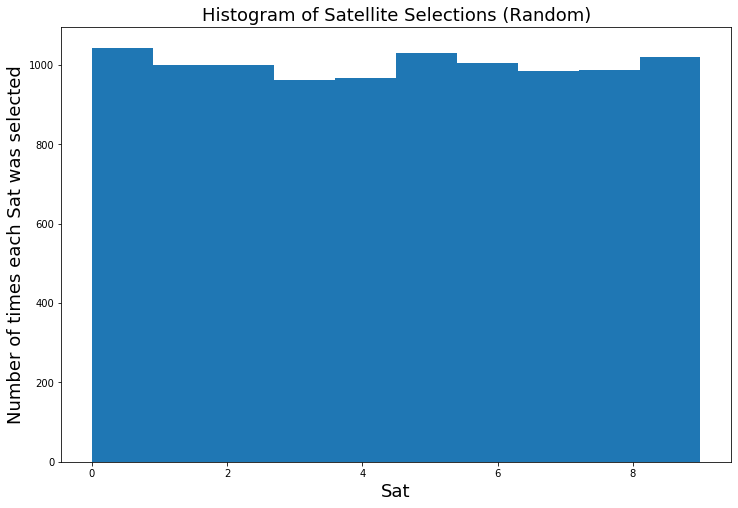

In [10]:
# Plot
plt.hist(Sat_selected)
plt.title('Histogram of Satellite Selections (Random)', fontsize=18)
plt.xlabel('Sat', fontsize=18)
plt.ylabel('Number of times each Sat was selected', fontsize=18)
# Control Size
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()
# Note: SAT indices 0 to 9 <--> SAT1 to SAT 10

### Upper Confidence Bound (UCB) algorithm

In [12]:
numbers_of_selections = [0] * d
print(numbers_of_selections)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [13]:
# Implementing UCB
import math
N = Rows
d = Cols
Sat_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    Sat = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            Sat = i
    Sat_selected.append(Sat)
    numbers_of_selections[Sat] = numbers_of_selections[Sat] + 1
    reward = dataset.values[n, Sat]
    sums_of_rewards[Sat] = sums_of_rewards[Sat] + reward
    total_reward = total_reward + reward

In [14]:
total_reward

2178

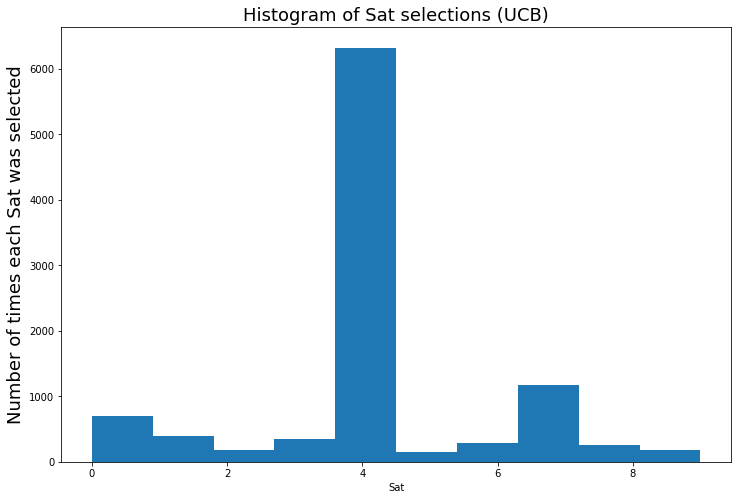

In [50]:
# Plot
plt.hist(Sat_selected)
plt.title('Histogram of Sat selections (UCB)', fontsize=18)
plt.xlabel('Sat')
plt.ylabel('Number of times each Sat was selected', fontsize=18)
# Control Size
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()
# Note: SAT indices 0 to 9 <--> SAT1 to SAT 10

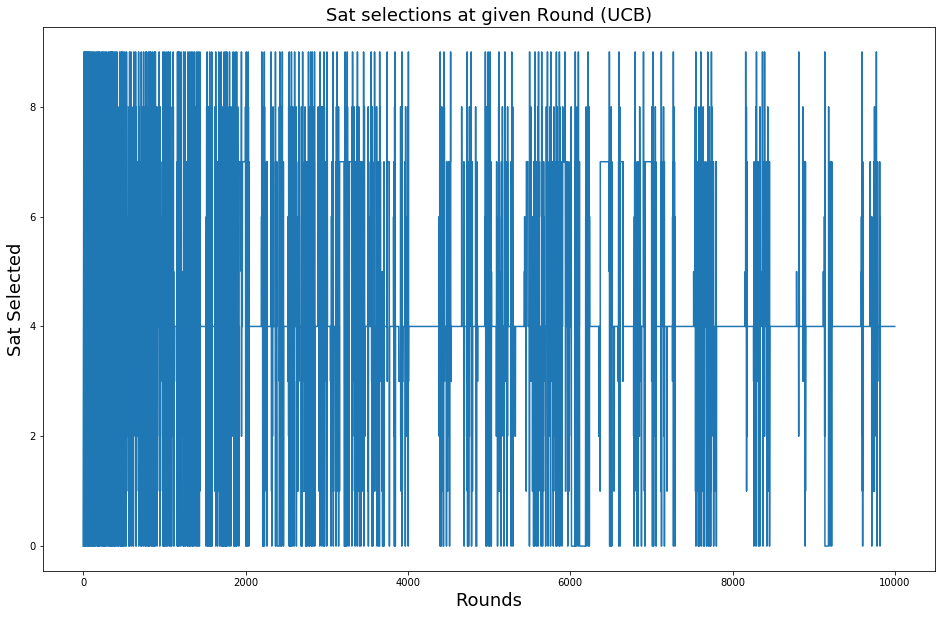

In [51]:
# Time switching [Exploration Vs Exploitation]
plt.plot(Sat_selected)
plt.title('Sat selections at given Round (UCB)', fontsize=18)
plt.xlabel('Rounds', fontsize=18)
plt.ylabel('Sat Selected', fontsize=18)
# Control Size
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.show()

In [21]:
Sat_selected[0:25] # Note: SAT indices 0 to 9 <--> SAT1 to SAT 10

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3]

In [22]:
Sat_selected[-25:-1] # Note: SAT indices 0 to 9 <--> SAT1 to SAT 10

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]